In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [296]:
df_train = pd.read_csv('/kaggle/input/donedrivetrain-csv/train.csv')

In [297]:
#数据分析
df_train = df_train.drop("id", axis=1, errors='ignore')
df_train.describe()

,loanAmnt,term,interestRate,installment,employmentTitle,homeOwnership,annualIncome,verificationStatus,isDefault,purpose,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
count,800000.000000,800000.000000,800000.000000,800000.000000,799999.000000,800000.000000,8.000000e+05,800000.000000,800000.000000,800000.000000,...,759730.000000,759730.000000,759730.000000,759729.000000,759730.000000,766761.000000,730248.000000,759730.000000,759730.000000,759730.000000
mean,14416.818875,3.482745,13.238391,437.947723,72005.351714,0.614213,7.613391e+04,1.009683,0.199513,1.745982,...,8.107937,8.575994,8.282953,14.622488,5.592345,11.643896,0.000815,0.003384,0.089366,2.178606
std,8716.086178,0.855832,4.765757,261.460393,106585.640204,0.675749,6.894751e+04,0.782716,0.399634,2.367453,...,4.799210,7.400536,4.561689,8.124610,3.216184,5.484104,0.030075,0.062041,0.509069,1.844377
min,500.000000,3.000000,5.310000,15.690000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8000.000000,3.000000,9.750000,248.450000,427.000000,0.000000,4.560000e+04,0.000000,0.000000,0.000000,...,5.000000,4.000000,5.000000,9.000000,3.000000,8.000000,0.000000,0.000000,0.000000,1.000000
50%,12000.000000,3.000000,12.740000,375.135000,7755.000000,1.000000,6.500000e+04,1.000000,0.000000,0.000000,...,7.000000,7.000000,7.000000,13.000000,5.000000,11.000000,0.000000,0.000000,0.000000,2.000000
75%,20000.000000,3.000000,15.990000,580.710000,117663.500000,1.000000,9.000000e+04,2.000000,0.000000,4.000000,...,11.000000,11.000000,10.000000,19.000000,7.000000,14.000000,0.000000,0.000000,0.000000,3.000000
max,40000.000000,5.000000,30.990000,1715.420000,378351.000000,5.000000,1.099920e+07,2.000000,1.000000,13.000000,...,70.000000,132.000000,79.000000,128.000000,45.000000,82.000000,4.000000,4.000000,39.000000,30.000000


In [298]:
df_train.head()

invalid value encountered in greater
invalid value encountered in less
invalid value encountered in greater
invalid value encountered in greater
invalid value encountered in less
invalid value encountered in greater


,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,110000.0,...,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,46000.0,...,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,74000.0,...,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,11000.0,3,7.26,340.96,A,A4,46854.0,10+ years,1,118000.0,...,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,3000.0,3,12.99,101.07,C,C2,54.0,NaN,1,29000.0,...,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0


In [299]:
df_train.columns

Index(['loanAmnt', 'term', 'interestRate', 'installment', 'grade', 'subGrade',
       'employmentTitle', 'employmentLength', 'homeOwnership', 'annualIncome',
       'verificationStatus', 'issueDate', 'isDefault', 'purpose', 'postCode',
       'regionCode', 'dti', 'delinquency_2years', 'ficoRangeLow',
       'ficoRangeHigh', 'openAcc', 'pubRec', 'pubRecBankruptcies', 'revolBal',
       'revolUtil', 'totalAcc', 'initialListStatus', 'applicationType',
       'earliesCreditLine', 'title', 'policyCode', 'n0', 'n1', 'n2', 'n3',
       'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14'],
      dtype='object')

In [300]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 46 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   loanAmnt            800000 non-null  float64
 1   term                800000 non-null  int64  
 2   interestRate        800000 non-null  float64
 3   installment         800000 non-null  float64
 4   grade               800000 non-null  object 
 5   subGrade            800000 non-null  object 
 6   employmentTitle     799999 non-null  float64
 7   employmentLength    753201 non-null  object 
 8   homeOwnership       800000 non-null  int64  
 9   annualIncome        800000 non-null  float64
 10  verificationStatus  800000 non-null  int64  
 11  issueDate           800000 non-null  object 
 12  isDefault           800000 non-null  int64  
 13  purpose             800000 non-null  int64  
 14  postCode            799999 non-null  float64
 15  regionCode          800000 non-nul

In [301]:
df_train.isnull().any().sum()

22

<Axes: >

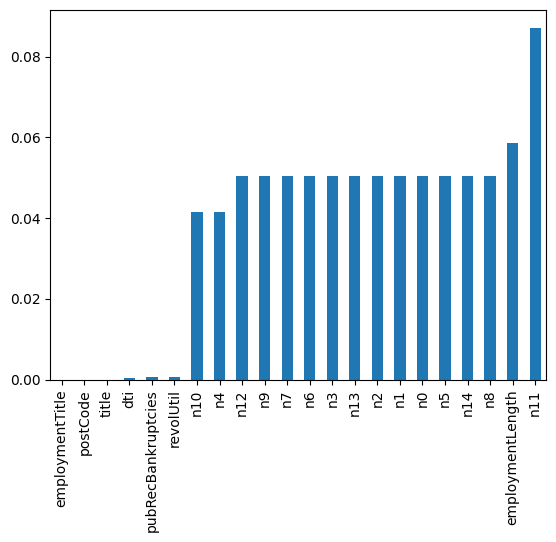

In [302]:
miss = df_train.isnull().sum()/len(df_train)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss.plot.bar()

In [303]:
numerical_feature = list(df_train.select_dtypes(exclude=['object']).columns) #数值型特征
category_feature = list(filter(lambda x: x not in numerical_feature,list(df_train.columns))) #类别型特征
print("numerical_feature:\n",numerical_feature)
print("category_feature:\n",category_feature)

numerical_feature:
 ['loanAmnt', 'term', 'interestRate', 'installment', 'employmentTitle', 'homeOwnership', 'annualIncome', 'verificationStatus', 'isDefault', 'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years', 'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec', 'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc', 'initialListStatus', 'applicationType', 'title', 'policyCode', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14']
category_feature:
 ['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']


In [304]:
#划分数值型变量中的连续变量和离散变量
def get_numerical_serial_feature(df,features):
    numerical_serial_feature = []
    numerical_noserial_feature = []
    for feature in features:
        temp = df[feature].nunique()
        if temp <= 10:
            numerical_noserial_feature.append(feature)
            continue
        numerical_serial_feature.append(feature)
    return numerical_serial_feature,numerical_noserial_feature
    
numerical_serial_feature,numerical_noserial_feature = get_numerical_serial_feature(df_train,numerical_feature)

print("numerical_serial_feature:\n",numerical_serial_feature)
print("numerical_noserial_feature:\n",numerical_noserial_feature)

numerical_serial_feature:
 ['loanAmnt', 'interestRate', 'installment', 'employmentTitle', 'annualIncome', 'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years', 'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec', 'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc', 'title', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n13', 'n14']
numerical_noserial_feature:
 ['term', 'homeOwnership', 'verificationStatus', 'isDefault', 'initialListStatus', 'applicationType', 'policyCode', 'n11', 'n12']


In [305]:
#离散数值变量分析
df_train['term'].value_counts()

term
3    606902
5    193098
Name: count, dtype: int64

In [306]:
df_train['homeOwnership'].value_counts()

homeOwnership
0    395732
1    317660
2     86309
3       185
5        81
4        33
Name: count, dtype: int64

In [307]:
df_train['verificationStatus'].value_counts()

verificationStatus
1    309810
2    248968
0    241222
Name: count, dtype: int64

In [308]:
df_train['isDefault'].value_counts()

isDefault
0    640390
1    159610
Name: count, dtype: int64

In [309]:
df_train['initialListStatus'].value_counts()

initialListStatus
0    466438
1    333562
Name: count, dtype: int64

In [310]:
df_train['applicationType'].value_counts()

applicationType
0    784586
1     15414
Name: count, dtype: int64

In [311]:
df_train['policyCode'].value_counts()

policyCode
1.0    800000
Name: count, dtype: int64

In [312]:
df_train['n11'].value_counts()

n11
0.0    729682
1.0       540
2.0        24
4.0         1
3.0         1
Name: count, dtype: int64

In [313]:
df_train['n12'].value_counts()

n12
0.0    757315
1.0      2281
2.0       115
3.0        16
4.0         3
Name: count, dtype: int64

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
The figure layout has changed to tight
The figure layout has changed to tight


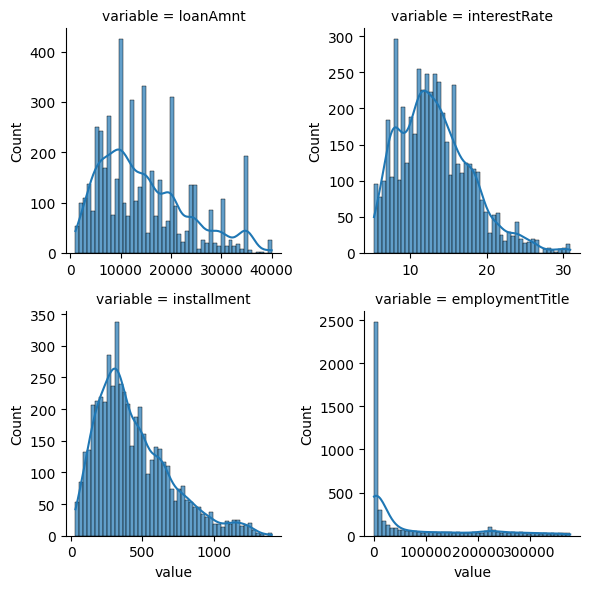

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
The figure layout has changed to tight
The figure layout has changed to tight


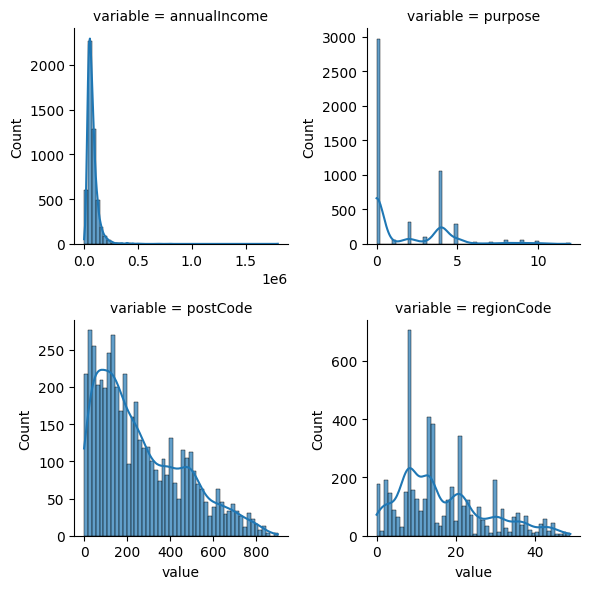

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
The figure layout has changed to tight
The figure layout has changed to tight


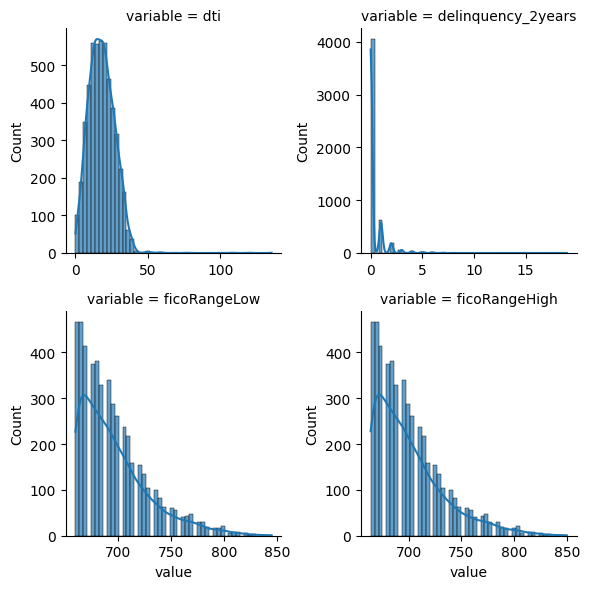

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
The figure layout has changed to tight
The figure layout has changed to tight


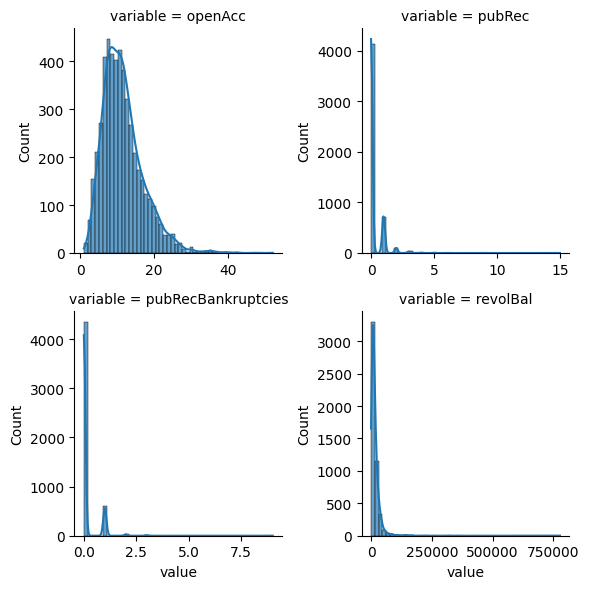

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
The figure layout has changed to tight
The figure layout has changed to tight


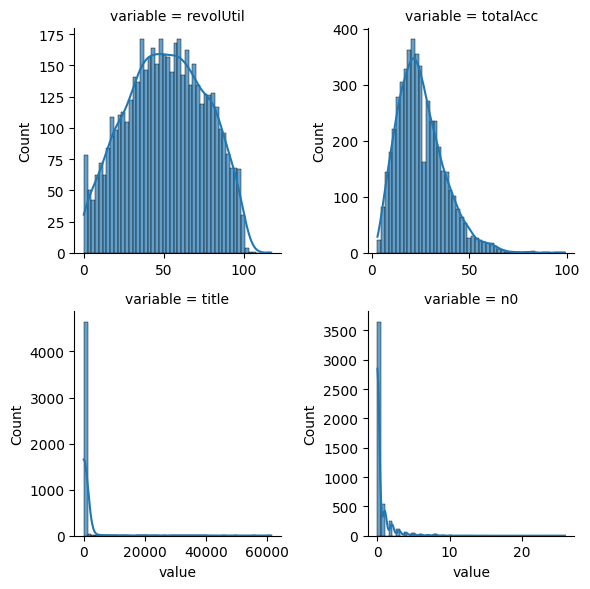

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
The figure layout has changed to tight
The figure layout has changed to tight


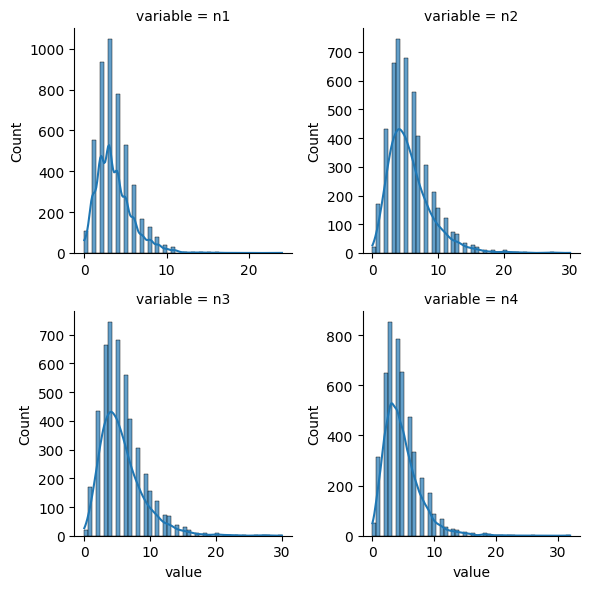

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
The figure layout has changed to tight
The figure layout has changed to tight


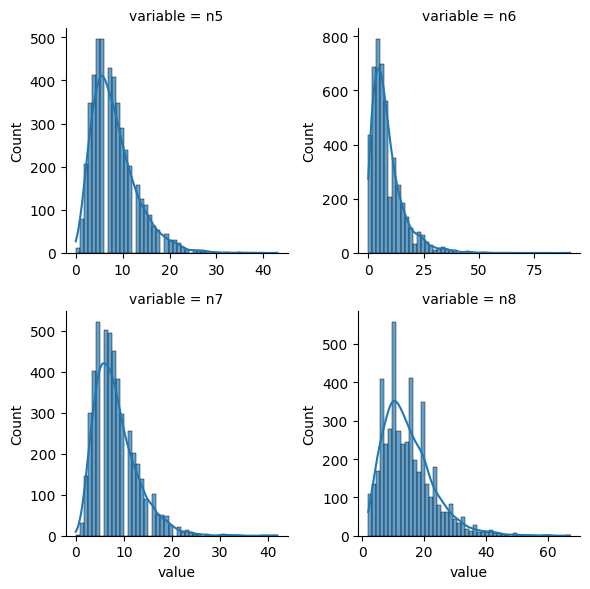

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
The figure layout has changed to tight
The figure layout has changed to tight


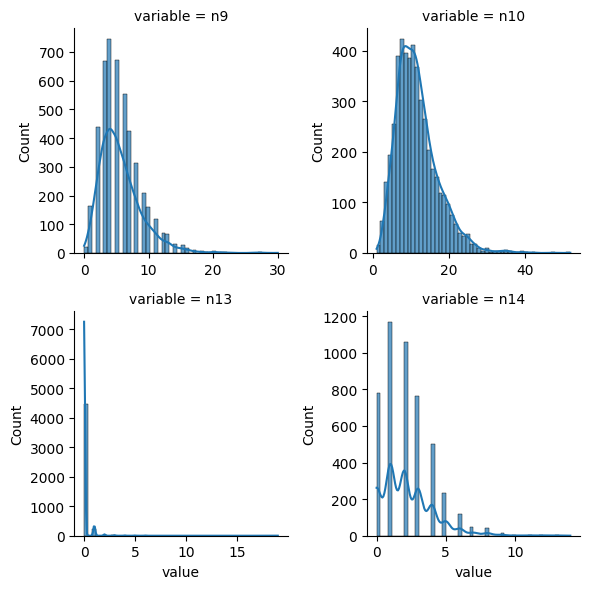

In [314]:
#连续性数值变量分析
#数据分布可视化

#抽样
sample_df = df_train.sample(n=min(5000, len(df_train)), random_state=42)
#分批绘制
batch_size = 4
num_features = len(numerical_serial_feature)

for i in range(0, num_features, batch_size):
    batch_features = numerical_serial_feature[i:i+batch_size]
    
    if not batch_features:
        continue
    
    f = pd.melt(sample_df, value_vars=batch_features)  
    g = sns.FacetGrid(
        f, 
        col="variable", 
        col_wrap=2, 
        sharex=False, 
        sharey=False
    )
    g.map_dataframe(
        sns.histplot, 
        x="value", 
        kde=True, 
        bins=50,
        alpha=0.7
    )
    plt.tight_layout()
    plt.show()

In [315]:
#类别型变量分析
df_train['grade'].value_counts()

grade
B    233690
C    227118
A    139661
D    119453
E     55661
F     19053
G      5364
Name: count, dtype: int64

In [316]:
df_train['subGrade'].value_counts()

subGrade
C1    50763
B4    49516
B5    48965
B3    48600
C2    47068
C3    44751
C4    44272
B2    44227
B1    42382
C5    40264
A5    38045
A4    30928
D1    30538
D2    26528
A1    25909
D3    23410
A3    22655
A2    22124
D4    21139
D5    17838
E1    14064
E2    12746
E3    10925
E4     9273
E5     8653
F1     5925
F2     4340
F3     3577
F4     2859
F5     2352
G1     1759
G2     1231
G3      978
G4      751
G5      645
Name: count, dtype: int64

In [317]:
df_train['employmentLength'].value_counts()

employmentLength
10+ years    262753
2 years       72358
< 1 year      64237
3 years       64152
1 year        52489
5 years       50102
4 years       47985
6 years       37254
8 years       36192
7 years       35407
9 years       30272
Name: count, dtype: int64

In [318]:
df_train['issueDate'].value_counts()

issueDate
2016-03-01    29066
2015-10-01    25525
2015-07-01    24496
2015-12-01    23245
2014-10-01    21461
              ...  
2007-08-01       23
2007-07-01       21
2008-09-01       19
2007-09-01        7
2007-06-01        1
Name: count, Length: 139, dtype: int64

In [319]:
df_train['earliesCreditLine'].value_counts()

earliesCreditLine
Aug-2001    5567
Sep-2003    5403
Aug-2002    5403
Oct-2001    5258
Aug-2000    5246
            ... 
Feb-1960       1
Sep-1957       1
Jul-1955       1
May-1960       1
Jan-1946       1
Name: count, Length: 720, dtype: int64

In [320]:
df_train['isDefault'].value_counts()

isDefault
0    640390
1    159610
Name: count, dtype: int64

In [321]:
#转化成时间格式
df_train['issueDate'] = pd.to_datetime(df_train['issueDate'],format='%Y-%m-%d')
startdate = datetime.datetime.strptime('2007-06-01', '%Y-%m-%d')
df_train['issueDate'] = df_train['issueDate'].apply(lambda x: x-startdate).dt.days

In [322]:
#特征工程
#填充缺失值
target_column = 'isDefault'

# 筛选出数值特征（排除目标列）
numerical_feature_no_target = [col for col in numerical_feature if col != target_column]

# 按照中位数填充数值型特征
df_train[numerical_feature_no_target] = df_train[numerical_feature_no_target].fillna(df_train[numerical_feature_no_target].median())

# 按照众数填充类别型特征
for col in category_feature:
    # 获取训练集的众数
    mode_val = df_train[col].mode()[0]
    df_train[col].fillna(mode_val, inplace=True)

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




In [323]:
df_train.isnull().sum()

loanAmnt              0
term                  0
interestRate          0
installment           0
grade                 0
subGrade              0
employmentTitle       0
employmentLength      0
homeOwnership         0
annualIncome          0
verificationStatus    0
issueDate             0
isDefault             0
purpose               0
postCode              0
regionCode            0
dti                   0
delinquency_2years    0
ficoRangeLow          0
ficoRangeHigh         0
openAcc               0
pubRec                0
pubRecBankruptcies    0
revolBal              0
revolUtil             0
totalAcc              0
initialListStatus     0
applicationType       0
earliesCreditLine     0
title                 0
policyCode            0
n0                    0
n1                    0
n2                    0
n3                    0
n4                    0
n5                    0
n6                    0
n7                    0
n8                    0
n9                    0
n10             

In [324]:
#异常值处理
# 创建独立的异常值分析数据框
outlier_info = pd.DataFrame()

for fea in numerical_feature:
    # 计算异常值范围
    data_std = np.std(df_train[fea])
    data_mean = np.mean(df_train[fea])
    lower_bound = data_mean - 3 * data_std
    upper_bound = data_mean + 3 * data_std
    
    # 创建临时标记列
    temp_outlier_mask = (df_train[fea] < lower_bound) | (df_train[fea] > upper_bound)
    
    # 收集统计信息
    outlier_info[fea] = {
        'mean': data_mean,
        'std': data_std,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outlier_count': temp_outlier_mask.sum(),
        'outlier_default_rate': df_train.loc[temp_outlier_mask, 'isDefault'].mean()
    }

# 打印异常值分析
print("异常值分析报告:")
print(outlier_info)

# 根据分析决定是否删除异常值
to_remove = []
for fea, info in outlier_info.items():
    if info['outlier_count'] < len(df_train) * 0.01 and info['outlier_default_rate'] < 0.1:
        continue
    else:
        to_remove.extend(df_train.index[(df_train[fea] < info['lower_bound']) | 
                                       (df_train[fea] > info['upper_bound'])].tolist())

# 删除被标记的行
to_remove = list(set(to_remove))  # 去重
df_train = df_train.drop(to_remove)

print(f"删除 {len(to_remove)} 行异常值")
df_train = df_train.reset_index(drop=True)

异常值分析报告:
                          loanAmnt      term  interestRate  installment  \
mean                  14416.818875  3.482745     13.238391   437.947723   
std                    8716.080731  0.855831      4.765754   261.460230   
lower_bound          -11731.423317  0.915251     -1.058869  -346.432966   
upper_bound           40565.061067  6.050239     27.535652  1222.328413   
outlier_count             0.000000  0.000000   5741.000000  7954.000000   
outlier_default_rate           NaN       NaN      0.507925     0.270556   

                      employmentTitle  homeOwnership   annualIncome  \
mean                     72005.271401       0.614213   76133.910493   
std                     106585.531178       0.675748   68947.470580   
lower_bound            -247751.322134      -1.413032 -130708.501246   
upper_bound             391761.864936       2.641457  282976.322233   
outlier_count                0.000000     299.000000    6027.000000   
outlier_default_rate              NaN  

invalid value encountered in greater
invalid value encountered in less
invalid value encountered in greater


删除 187258 行异常值


In [325]:
# 列出所有需要删除的列（根据您提供的列表）
columns_to_delete = [
    'id_outliers', 'loanAmnt_outliers', 'term_outliers', 'interestRate_outliers',
    'installment_outliers', 'employmentTitle_outliers', 'homeOwnership_outliers',
    'annualIncome_outliers', 'verificationStatus_outliers', 'isDefault_outliers',
    'purpose_outliers', 'postCode_outliers', 'regionCode_outliers', 'dti_outliers',
    'delinquency_2years_outliers', 'ficoRangeLow_outliers', 'ficoRangeHigh_outliers',
    'openAcc_outliers', 'pubRec_outliers', 'pubRecBankruptcies_outliers', 'revolBal_outliers',
    'revolUtil_outliers', 'totalAcc_outliers', 'initialListStatus_outliers',
    'applicationType_outliers', 'title_outliers', 'policyCode_outliers',
    'n0_outliers', 'n1_outliers', 'n2_outliers', 'n3_outliers',
    'n4_outliers', 'n5_outliers', 'n6_outliers', 'n7_outliers',
    'n8_outliers', 'n9_outliers', 'n10_outliers', 'n11_outliers',
    'n12_outliers', 'n13_outliers', 'n14_outliers', 'has_any_outlier'
]

df_train = df_train.drop(columns_to_delete, axis=1, errors='ignore')

In [326]:
#分类变量编码
df_train['employmentLength'].value_counts(dropna=False).sort_index()

employmentLength
1 year        41192
10+ years    231915
2 years       56272
3 years       50092
4 years       37347
5 years       38881
6 years       28852
7 years       27689
8 years       28178
9 years       23641
< 1 year      48683
Name: count, dtype: int64

In [327]:
def employmentLength_to_int(s):
    if pd.isnull(s):
        return s
    elif isinstance(s, (int, float, np.integer)): 
        return int(s)
    else:
        # 处理特殊字符和边界情况
        if s == '< 1 year': return 0
        if s == '10+ years' or s == '10 years': return 10
        return int(s.split()[0])

# 一次性完成转换，避免链式赋值警告
df_train['employmentLength'] = (
    df_train['employmentLength']
    .replace({
        '10+ years': 10,
        '< 1 year': 0
    })
    .apply(employmentLength_to_int)
)

In [328]:
df_train['employmentLength'].value_counts(dropna=False).sort_index()

employmentLength
0      48683
1      41192
2      56272
3      50092
4      37347
5      38881
6      28852
7      27689
8      28178
9      23641
10    231915
Name: count, dtype: int64

In [329]:
df_train['earliesCreditLine'].sample(5)

179759    Jul-1984
594849    Aug-2000
357978    Feb-1999
518986    Mar-2000
215958    Sep-2003
Name: earliesCreditLine, dtype: object

In [330]:
for data in [df_train]:
    data['earliesCreditLine'] = data['earliesCreditLine'].apply(lambda s: int(s[-4:]))

In [331]:
#标签编码
grade_order = sorted(df_train['grade'].unique(), reverse=True)
subgrade_order = sorted(df_train['subGrade'].unique(), reverse=True)

# 创建映射字典
grade_map = {grade: i for i, grade in enumerate(grade_order)}
subgrade_map = {subgrade: i for i, subgrade in enumerate(subgrade_order)}

# 应用映射
df_train['grade'] = df_train['grade'].map(grade_map)
df_train['subGrade'] = df_train['subGrade'].map(subgrade_map)

In [332]:
print(df_train.columns.tolist())
print(df_train.dtypes)

['loanAmnt', 'term', 'interestRate', 'installment', 'grade', 'subGrade', 'employmentTitle', 'employmentLength', 'homeOwnership', 'annualIncome', 'verificationStatus', 'issueDate', 'isDefault', 'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years', 'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec', 'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc', 'initialListStatus', 'applicationType', 'earliesCreditLine', 'title', 'policyCode', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14']
loanAmnt              float64
term                    int64
interestRate          float64
installment           float64
grade                   int64
subGrade                int64
employmentTitle       float64
employmentLength        int64
homeOwnership           int64
annualIncome          float64
verificationStatus      int64
issueDate               int64
isDefault               int64
purpose                 int64
postCode              float64

In [333]:
for data in [df_train]:
    data = pd.get_dummies(data, columns=[ 'homeOwnership', 'verificationStatus', 'purpose', 'regionCode'], drop_first=True)

In [334]:
#归一化
for feature in [numerical_feature_no_target]:
    df_train[feature] = (df_train[feature] - np.min(df_train[feature]) / (np.max(df_train[feature]) - np.min(df_train[feature])))

In [335]:
df_train.dtypes

loanAmnt              float64
term                  float64
interestRate          float64
installment           float64
grade                   int64
subGrade                int64
employmentTitle       float64
employmentLength        int64
homeOwnership         float64
annualIncome          float64
verificationStatus    float64
issueDate               int64
isDefault               int64
purpose               float64
postCode              float64
regionCode            float64
dti                   float64
delinquency_2years    float64
ficoRangeLow          float64
ficoRangeHigh         float64
openAcc               float64
pubRec                float64
pubRecBankruptcies    float64
revolBal              float64
revolUtil             float64
totalAcc              float64
initialListStatus     float64
applicationType       float64
earliesCreditLine       int64
title                 float64
policyCode            float64
n0                    float64
n1                    float64
n2        

In [336]:
df_train.sample(5)

,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
292895,2975.000003,3.000003,17.570003,106.920003,3,18,6762.000003,4,0.000003,40000.000003,...,8.000003,2.000003,9.000003,11.000003,6.000003,10.000003,0.000003,0.000003,0.000003,4.000003
347327,4000.000003,3.000003,15.050003,138.760003,4,21,7150.000003,0,1.000003,48000.000003,...,4.000003,3.000003,7.000003,11.000003,5.000003,8.000003,0.000003,0.000003,0.000003,5.000003
206432,7000.000003,3.000003,14.080003,239.520003,4,22,38.000003,10,0.000003,53000.000003,...,9.000003,16.000003,10.000003,21.000003,9.000003,13.000003,0.000003,0.000003,0.000003,6.000003
124745,10000.000003,5.000003,16.990003,248.480003,3,17,2205.000003,10,0.000003,40000.000003,...,7.000003,4.000003,5.000003,8.000003,4.000003,6.000003,0.000003,0.000003,0.000003,2.000003
271031,6625.000003,3.000003,14.330003,227.500003,4,24,308662.000003,7,2.000003,23000.000003,...,6.000003,2.000003,7.000003,8.000003,6.000003,10.000003,0.000003,0.000003,0.000003,0.000003


invalid value encountered in less
invalid value encountered in less
invalid value encountered in less


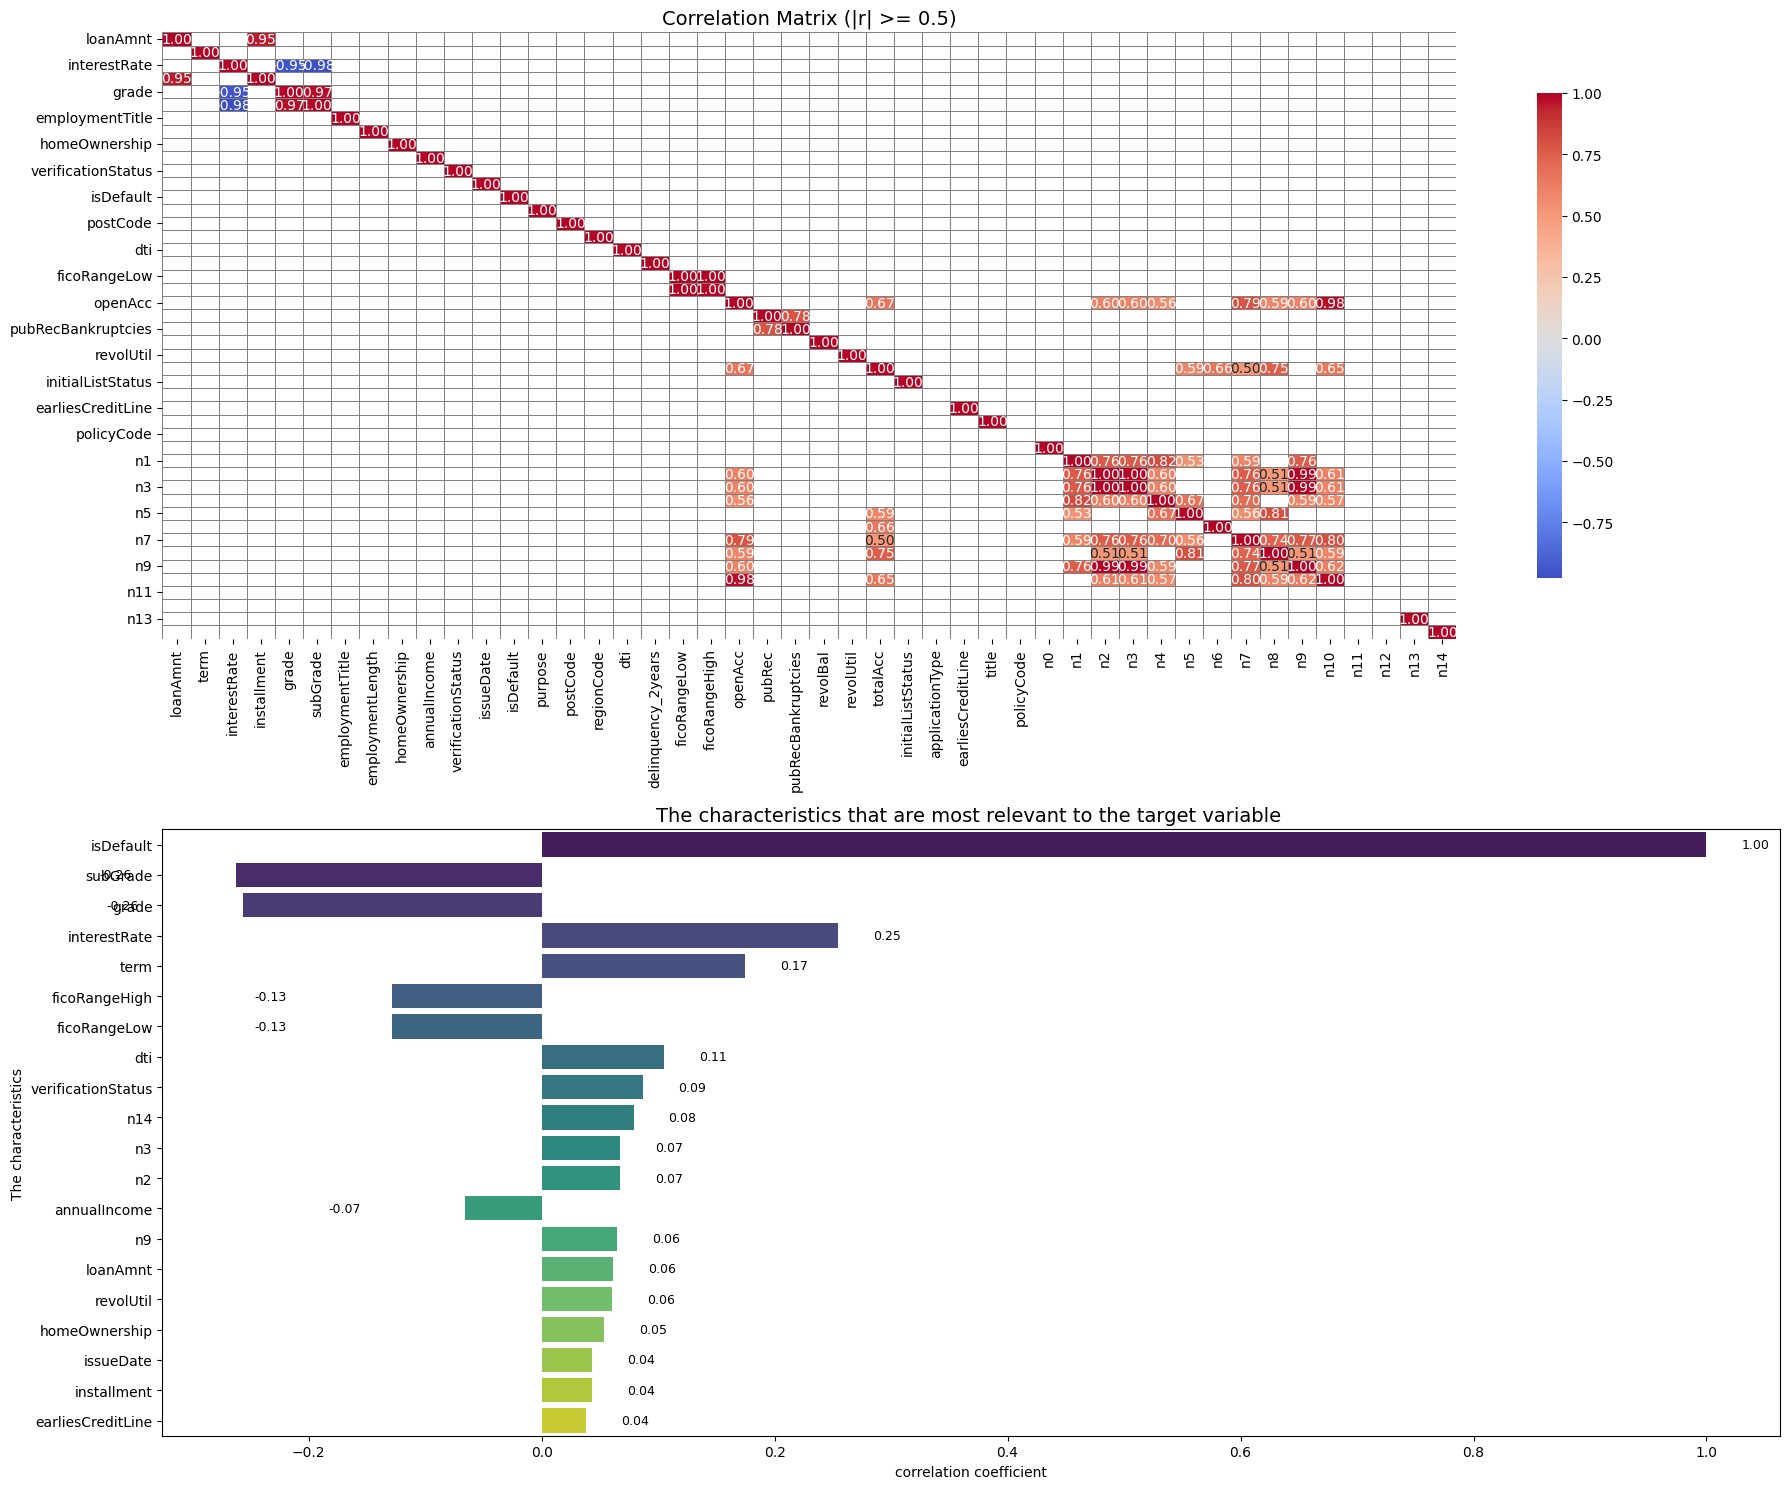


高相关性的特征对 (|r| > 0.7):
loanAmnt 和 installment: 0.952
interestRate 和 grade: -0.951
interestRate 和 subGrade: -0.977
grade 和 subGrade: 0.974
ficoRangeLow 和 ficoRangeHigh: 1.000
openAcc 和 n7: 0.790
openAcc 和 n10: 0.976
pubRec 和 pubRecBankruptcies: 0.784
totalAcc 和 n8: 0.746
n1 和 n2: 0.763
n1 和 n3: 0.763
n1 和 n4: 0.816
n1 和 n9: 0.760
n2 和 n3: 1.000
n2 和 n7: 0.760
n2 和 n9: 0.986
n3 和 n7: 0.760
n3 和 n9: 0.986
n5 和 n8: 0.807
n7 和 n8: 0.736
n7 和 n9: 0.765
n7 和 n10: 0.805

与目标变量(isDefault)最相关的前20个特征:
subGrade: -0.262
grade: -0.256
interestRate: 0.254
term: 0.175
ficoRangeHigh: -0.129
ficoRangeLow: -0.129
dti: 0.105
verificationStatus: 0.087
n14: 0.079
n3: 0.067
n2: 0.067
annualIncome: -0.066
n9: 0.065
loanAmnt: 0.061
revolUtil: 0.060
homeOwnership: 0.054
issueDate: 0.043
installment: 0.043
earliesCreditLine: 0.038
n1: 0.036


In [337]:
plt.figure(figsize=(18, 15))

# 创建单个子图
ax1 = plt.subplot(2, 1, 1)  # 2行1列的第一个子图

# 计算相关系数矩阵
corr = df_train.corr()

# 改进的热力图绘制
# 只显示高相关性的值以提高可读性
# 设置mask以只显示|r| > 0.5的值
mask = np.abs(corr) < 0.5

# 使用更清晰的配色方案
sns.heatmap(corr, 
            cmap='coolwarm', 
            annot=True,
            fmt=".2f",  # 只显示两位小数
            linewidths=0.5,
            linecolor='gray',
            center=0,
            mask=mask,  # 隐藏低相关值
            ax=ax1,  # 指定绘图的轴
            cbar_kws={"shrink": 0.8})

ax1.set_title("Correlation Matrix (|r| >= 0.5)", fontsize=14)

# 添加目标变量相关性的分析（第二子图）
ax2 = plt.subplot(2, 1, 2)  # 第二行

# 获取与目标变量相关性最高的特征
top_corr_features = abs(corr['isDefault']).sort_values(ascending=False).head(20).index

# 绘制条形图显示最相关的特征
corr_top = corr.loc[top_corr_features, 'isDefault']
sns.barplot(x=corr_top, y=corr_top.index, palette='viridis', ax=ax2)
ax2.set_title("The characteristics that are most relevant to the target variable ", fontsize=14)
ax2.set_xlabel("correlation coefficient")
ax2.set_ylabel("The characteristics")

# 为高相关性添加数值标签
for i, (name, value) in enumerate(zip(corr_top.index, corr_top)):
    ax2.text(value + (0.03 if value > 0 else -0.09), i, f"{value:.2f}", 
             ha='left' if value > 0 else 'right', va='center', fontsize=9)

# 调整布局
plt.tight_layout()
plt.show()

# 输出高相关性的特征对
print("\n高相关性的特征对 (|r| > 0.7):")
for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        if abs(corr.iloc[i, j]) > 0.7:
            col1 = corr.columns[i]
            col2 = corr.columns[j]
            print(f"{col1} 和 {col2}: {corr.iloc[i, j]:.3f}")

# 输出与目标变量最相关的前20个特征
print("\n与目标变量(isDefault)最相关的前20个特征:")
target_corr = corr['isDefault'].sort_values(key=abs, ascending=False)[1:21]  # 排除目标变量自身
for feature, corr_value in target_corr.items():
    print(f"{feature}: {corr_value:.3f}")

In [338]:
def drop_highly_correlated(df):
    """
    删除高度相关的冗余特征（|r| > 0.7）
    策略：保留与目标变量相关性更高或更易解释的特征
    """
    # 创建特征字典存储决策
    feature_decisions = {
        # 贷款金额相关特征
        'loanAmnt': {'action': 'drop', 'reason': '与installment高度相关(0.952)，保留installment'},
        # 评分相关特征
        'grade': {'action': 'drop', 'reason': '与subGrade高度相关(0.974)，保留更细粒度的subGrade'},
        # FICO评分
        'ficoRangeLow': {'action': 'drop', 'reason': '与ficoRangeHigh完全相关(1.0)，保留ficoRangeHigh'},
        'ficoRangeHigh': {'action': 'keep', 'reason': '与目标相关性更高'},
        # n系列特征
        'n7': {'action': 'drop', 'reason': '与openAcc和n10高度相关'},
        'n10': {'action': 'drop', 'reason': '与openAcc高度相关(0.976)，保留openAcc'},
        'pubRec': {'action': 'drop', 'reason': '与pubRecBankruptcies高度相关(0.784)，保留pubRecBankruptcies'},
        'n8': {'action': 'drop', 'reason': '与totalAcc高度相关(0.746)，保留totalAcc'},
        'n1': {'action': 'drop', 'reason': 'n1,n2,n3,n4,n9高度相关组中，保留n3（与目标相关性更高）'},
        'n3': {'action': 'keep', 'reason': '在n系列中与目标相关性最高(0.067)'},
        'n2': {'action': 'drop', 'reason': '与n3完全相关(1.0)，保留n3'},
        'n4': {'action': 'drop', 'reason': '与n1高度相关(0.816)'},
        'n9': {'action': 'drop', 'reason': '与n2高度相关(0.986)'},
        'n5': {'action': 'drop', 'reason': '与n8高度相关(0.807)，但n8已被移除'}
    }
    
    # 应用决策
    features_to_drop = [feat for feat, decision in feature_decisions.items() if decision['action'] == 'drop']
    df_reduced = df.drop(columns=features_to_drop)
    
    print(f"移除了 {len(features_to_drop)} 个高度相关的特征")
    return df_reduced

# 应用特征删除
df_reduced = drop_highly_correlated(df_train)

移除了 12 个高度相关的特征


In [339]:
def create_composite_features(df):
    """创建有意义的复合特征增强模型预测能力"""
    
    # 1. 创建风险评分特征
    df['risk_score'] = df['interestRate'] * df['term'] / df['annualIncome']
    
    # 2. 创建FICO-利率交互特征
    df['fico_interest_ratio'] = df['ficoRangeHigh'] / (df['interestRate'] + 1e-6)
    
    # 3. 创建DTI-收入组合
    df['dti_income'] = df['dti'] * df['annualIncome']
    
    # 4. 创建分期付款负担
    df['installment_burden'] = df['installment'] / (df['annualIncome'] / 12)
    
    # 5. 创建子等级与就业长度的交互
    df['subGrade_employment'] = df['subGrade'] * (df['employmentLength'] + 1)
    
    # 6. 创建循环信用利用率指标
    df['revol_utilization_score'] = df['revolUtil'] / (df['openAcc'] + 1)
    
    print("新增了 6 个复合特征")
    return df

# 应用复合特征创建
df_enhanced = create_composite_features(df_reduced)

新增了 6 个复合特征


In [340]:
def select_features(df, selected_features, add_target=True):
    """选择指定特征，处理缺失值"""
    # 确保所有特征都存在
    missing_features = [f for f in selected_features if f not in df.columns]
    if missing_features:
        print(f"警告: 数据框中缺少以下特征: {missing_features}")
        # 尝试创建缺失的复合特征
        for feature in missing_features:
            if feature == 'risk_score' and all(f in df.columns for f in ['interestRate', 'term', 'annualIncome']):
                df['risk_score'] = df['interestRate'] * df['term'] / (df['annualIncome'] + 1e-6)
            elif feature == 'fico_interest_ratio' and all(f in df.columns for f in ['ficoRangeHigh', 'interestRate']):
                df['fico_interest_ratio'] = df['ficoRangeHigh'] / (df['interestRate'] + 1e-6)
            elif feature == 'installment_burden' and all(f in df.columns for f in ['installment', 'annualIncome']):
                monthly_income = (df['annualIncome'] + 1e-6) / 12
                df['installment_burden'] = df['installment'] / monthly_income
            elif feature == 'subGrade_employment' and all(f in df.columns for f in ['subGrade', 'employmentLength']):
                employment_length = df['employmentLength'].fillna(0)
                df['subGrade_employment'] = df['subGrade'] * (employment_length + 1)
    
    # 更新特征列表（仅保留存在的特征）
    existing_features = [f for f in selected_features if f in df.columns]
    missing_after = set(selected_features) - set(existing_features)
    if missing_after:
        print(f"仍然缺少以下特征，无法创建: {missing_after}")
    
    # 添加目标变量（如需要且存在）
    if add_target and 'isDefault' in df.columns:
        final_features = existing_features + ['isDefault']
    else:
        final_features = existing_features
    
    return df[final_features].copy()

# 4. 完整的特征工程流程
def feature_engineering_pipeline(df):
    """执行完整的特征工程流程"""
    print("="*50)
    print("开始特征工程流程")
    print(f"原始数据形状: {df.shape}")
    
    # 步骤1: 删除高度相关特征
    df_reduced = drop_highly_correlated(df)
    print(f"删除冗余特征后形状: {df_reduced.shape}")
    
    # 步骤2: 创建复合特征
    df_enhanced = create_composite_features(df_reduced)
    print(f"添加复合特征后形状: {df_enhanced.shape}")
    
    # 定义选定特征列表
    selected_features = [
        'subGrade',             # 最强的预测器 (r=-0.262)
        'interestRate',         # 高相关性 (r=0.254)
        'term',                 # 中期相关性 (r=0.175)
        'ficoRangeHigh',        # 关键信用评分指标
        'dti',                  # 债务负担比率
        'verificationStatus',  # 收入验证状态
        'n3',                   # 保留的n系列中预测力最强的
        'revolUtil',             # 循环信用利用率
        'risk_score',           # 综合风险指标
        'fico_interest_ratio',   # 风险价格比
        'installment_burden',   # 实际支付负担
        'subGrade_employment'   # 信用风险与就业交互
    ]
    
    # 步骤3: 选择最终特征
    df_final = select_features(df_enhanced, selected_features)
    print(f"最终数据形状: {df_final.shape}")
    
    return df_final

# 5. 使用完整流程处理数据
df = feature_engineering_pipeline(df_train)

开始特征工程流程
原始数据形状: (612742, 46)
移除了 12 个高度相关的特征
删除冗余特征后形状: (612742, 34)
新增了 6 个复合特征
添加复合特征后形状: (612742, 40)
最终数据形状: (612742, 13)


In [341]:
df.head()

,subGrade,interestRate,term,ficoRangeHigh,dti,verificationStatus,n3,revolUtil,risk_score,fico_interest_ratio,installment_burden,subGrade_employment,isDefault
0,13,19.520003,5.000003,734.000003,17.050003,2.000003,2.000003,48.900003,0.000887,37.602452,0.100142,39,1
1,18,18.490003,5.000003,704.000003,27.830003,2.000003,5.000003,38.900003,0.002010,38.074628,0.120496,108,0
2,17,16.990003,5.000003,679.000003,22.770003,2.000003,3.000003,51.800003,0.001148,39.964677,0.048352,153,0
3,31,7.690003,3.000003,759.000003,17.490003,0.000003,3.000003,8.500003,0.000659,98.699563,0.021926,310,0
4,22,14.980003,3.000003,669.000003,32.600003,2.000003,4.000003,59.700003,0.001498,44.659535,0.159416,44,0


In [342]:
df.describe()

,subGrade,interestRate,term,ficoRangeHigh,dti,verificationStatus,n3,revolUtil,risk_score,fico_interest_ratio,installment_burden,subGrade_employment,isDefault
count,612742.000000,612742.000000,612742.000000,612742.000000,612742.000000,612742.000000,612742.000000,612742.000000,612742.000000,612742.000000,612742.000000,612742.000000,612742.000000
mean,23.533440,13.019010,3.480166,699.677972,17.980498,0.979891,5.286288,52.919931,0.000851,61.355244,0.079400,168.411965,0.195092
std,6.194396,4.493658,0.854266,29.184049,8.292369,0.776508,2.611603,23.920583,0.000648,24.637423,0.041551,100.398973,0.396272
min,0.000000,5.310003,3.000003,634.000003,-0.999997,0.000003,0.000003,0.000003,0.000056,24.154235,0.001544,0.000000,0.000000
25%,20.000000,9.670003,3.000003,674.000003,11.780003,0.000003,3.000003,35.100003,0.000407,43.818055,0.047854,80.000000,0.000000
50%,24.000000,12.690003,3.000003,694.000003,17.460003,1.000003,5.000003,53.200003,0.000679,54.841318,0.073303,161.000000,0.000000
75%,28.000000,15.610003,3.000003,714.000003,23.760003,2.000003,7.000003,71.300003,0.001102,73.129582,0.105503,253.000000,0.000000
max,34.000000,27.490003,5.000003,794.000003,49.950003,2.000003,15.000003,125.300003,0.025000,149.529088,0.526240,374.000000,1.000000


In [343]:
#训练模型
#准备工作
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import lightgbm as lgb
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import shap

X = df.drop('isDefault', axis=1)
y = df['isDefault']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y
)

In [344]:
#评估函数
def evaluate_model(name, y_true, y_pred, y_prob=None):
    """评估模型性能"""
    acc = accuracy_score(y_true, y_pred)
    print(f"{name} 准确率: {acc:.4f}")
    
    if y_prob is not None:
        auc = roc_auc_score(y_true, y_prob)
        print(f"{name} AUC: {auc:.4f}")
    
    # 分类报告
    print("\n分类报告:")
    print(classification_report(y_true, y_pred))
    
    # 混淆矩阵
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"{name} Confusion matrix")
    plt.ylabel('True value')
    plt.xlabel('Predicted value')
    plt.show()
    
    results = {'accuracy': acc}
    if y_prob is not None:
        results['auc'] = auc
    
    return results


Training until validation scores don't improve for 50 rounds
[100]	train's auc: 0.714818	valid's auc: 0.707022
[200]	train's auc: 0.719814	valid's auc: 0.708175
[300]	train's auc: 0.72399	valid's auc: 0.708864
[400]	train's auc: 0.727842	valid's auc: 0.709241
[500]	train's auc: 0.731323	valid's auc: 0.709296
[600]	train's auc: 0.735119	valid's auc: 0.709447
Early stopping, best iteration is:
[574]	train's auc: 0.734236	valid's auc: 0.709502
GBDT 准确率: 0.8068
GBDT AUC: 0.7095

分类报告:
              precision    recall  f1-score   support

           0       0.81      0.99      0.89     98641
           1       0.55      0.05      0.09     23908

    accuracy                           0.81    122549
   macro avg       0.68      0.52      0.49    122549
weighted avg       0.76      0.81      0.74    122549



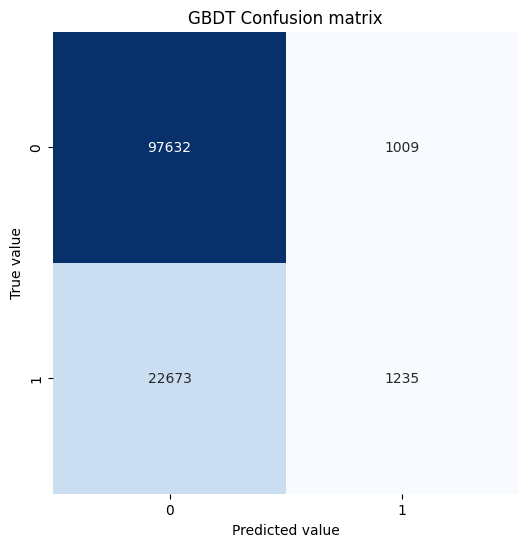

In [345]:
# GBDT(Lightgbm)
# --------------------------
print("\n" + "="*50)

# 创建LightGBM数据集
train_data = lgb.Dataset(X_train, label=y_train, free_raw_data=False)
test_data = lgb.Dataset(X_test, label=y_test, free_raw_data=False, reference=train_data)

# 设置模型参数
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'auc',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'min_child_samples': 20,
    'max_depth': -1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'n_jobs': -1,
    'seed': 42,
    'verbose': -1
}

# 训练模型
start_time = time.time()
gbm = lgb.train(
    params,
    train_data,
    num_boost_round=1000,
    valid_sets=[train_data, test_data],
    valid_names=['train', 'valid'],
    callbacks=[
        lgb.early_stopping(stopping_rounds=50, verbose=True),
        lgb.log_evaluation(period=100)
    ]
)
train_time = time.time() - start_time

# 预测
y_prob_gbm = gbm.predict(X_test)
y_pred_gbm = (y_prob_gbm > 0.5).astype(int)

# 评估
gbm_results = evaluate_model("GBDT", y_test, y_pred_gbm, y_prob_gbm)
gbm_results['train_time'] = train_time


RandomForest 准确率: 0.6793
RandomForest AUC: 0.7057

分类报告:
              precision    recall  f1-score   support

           0       0.88      0.70      0.78     98641
           1       0.32      0.59      0.42     23908

    accuracy                           0.68    122549
   macro avg       0.60      0.65      0.60    122549
weighted avg       0.77      0.68      0.71    122549



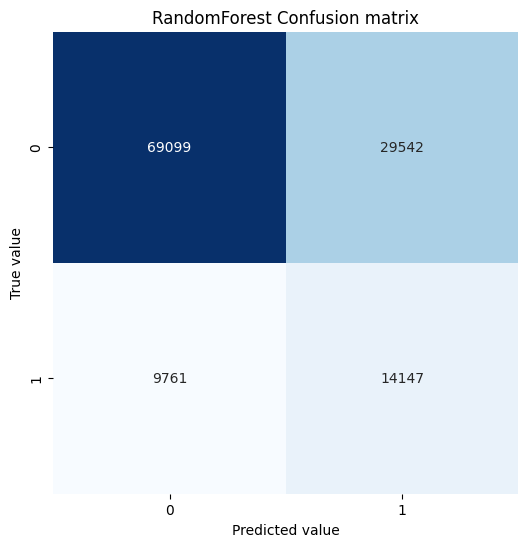

In [346]:
#随机森林
print("\n" + "="*50)

rf_params = {
    'n_estimators': 200,
    'criterion': 'gini',
    'max_depth': 15,
    'min_samples_split': 10,
    'min_samples_leaf': 5,
    'max_features': 'sqrt',
    'bootstrap': True,
    'class_weight': 'balanced',
    'n_jobs': -1,
    'random_state': 42,
    'verbose': 0
}

# 训练模型
rf = RandomForestClassifier(**rf_params)

start_time = time.time()
rf.fit(X_train, y_train)
train_time = time.time() - start_time

# 预测
y_prob_rf = rf.predict_proba(X_test)[:, 1]
y_pred_rf = rf.predict(X_test)

# 评估
rf_results = evaluate_model("RandomForest", y_test, y_pred_rf, y_prob_rf)
rf_results['train_time'] = train_time


DNN(
  (model): Sequential(
    (0): Linear(in_features=12, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.2, inplace=False)
    (8): Linear(in_features=64, out_features=32, bias=True)
    (9): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Linear(in_features=32, out_features=1, bias=True)
    (12): Sigmoid()
  )
)


The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.


Epoch 1/50 - Train Loss: 0.5016, Val Loss: 0.4523
Epoch 2/50 - Train Loss: 0.4522, Val Loss: 0.4516
Epoch 3/50 - Train Loss: 0.4516, Val Loss: 0.4510
Epoch 4/50 - Train Loss: 0.4510, Val Loss: 0.4509
Epoch 5/50 - Train Loss: 0.4507, Val Loss: 0.4507
Epoch 6/50 - Train Loss: 0.4505, Val Loss: 0.4506
Epoch 7/50 - Train Loss: 0.4502, Val Loss: 0.4506
Epoch 8/50 - Train Loss: 0.4500, Val Loss: 0.4502
Epoch 9/50 - Train Loss: 0.4500, Val Loss: 0.4503
Epoch 10/50 - Train Loss: 0.4496, Val Loss: 0.4502
Epoch 11/50 - Train Loss: 0.4497, Val Loss: 0.4502
Epoch 12/50 - Train Loss: 0.4494, Val Loss: 0.4501
Epoch 13/50 - Train Loss: 0.4495, Val Loss: 0.4501
Epoch 14/50 - Train Loss: 0.4493, Val Loss: 0.4499
Epoch 15/50 - Train Loss: 0.4491, Val Loss: 0.4497
Epoch 16/50 - Train Loss: 0.4490, Val Loss: 0.4500
Epoch 17/50 - Train Loss: 0.4490, Val Loss: 0.4496
Epoch 18/50 - Train Loss: 0.4488, Val Loss: 0.4497
Epoch 19/50 - Train Loss: 0.4489, Val Loss: 0.4498
Epoch 20/50 - Train Loss: 0.4486, Val Lo

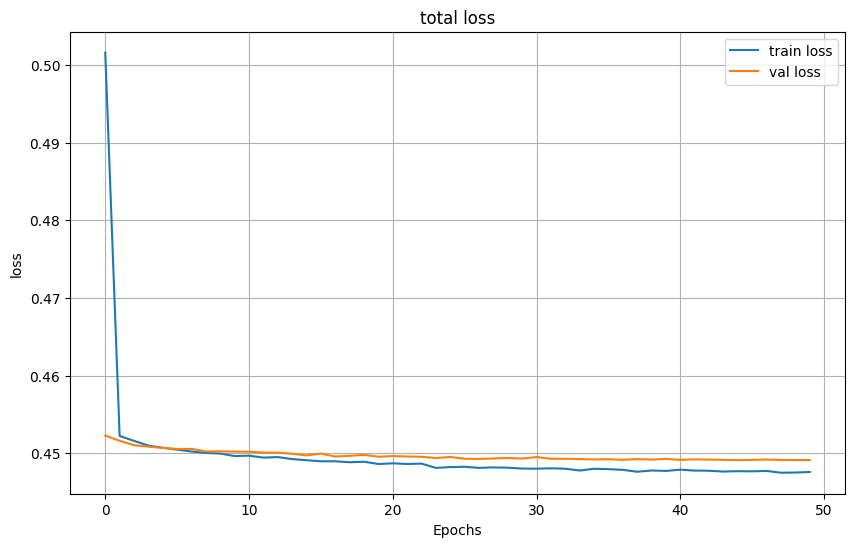

DNN 准确率: 0.8065
DNN AUC: 0.7085

分类报告:
              precision    recall  f1-score   support

         0.0       0.81      0.99      0.89     98641
         1.0       0.54      0.05      0.10     23908

    accuracy                           0.81    122549
   macro avg       0.68      0.52      0.49    122549
weighted avg       0.76      0.81      0.74    122549



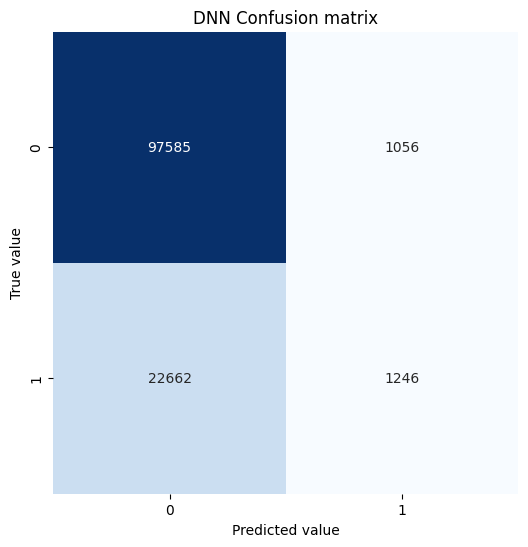

In [349]:
#深度神经网络 (PyTorch)
print("\n" + "="*50)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 创建PyTorch数据集
class CreditDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X.values if isinstance(X, pd.DataFrame) else X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# 转换为PyTorch数据集
train_dataset = CreditDataset(pd.DataFrame(X_train_scaled, columns=X_train.columns), y_train.values)
test_dataset = CreditDataset(pd.DataFrame(X_test_scaled, columns=X_test.columns), y_test.values)

# 创建数据加载器
batch_size = 2048
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# 定义神经网络结构
class DNN(nn.Module):
    def __init__(self, input_dim):
        super(DNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.2),
            
            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            
            nn.Linear(32, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        return self.model(x)

# 初始化模型
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DNN(X_train.shape[1]).to(device)
print(model)

# 定义损失函数和优化器
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.5, verbose=True)

# 训练模型
num_epochs = 50
train_losses = []
val_losses = []
best_val_loss = float('inf')
train_time = 0

start_time = time.time()
for epoch in range(num_epochs):
    # 训练阶段
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device).view(-1, 1)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    epoch_train_loss = running_loss / len(train_loader)
    train_losses.append(epoch_train_loss)
    
    # 验证阶段
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device).view(-1, 1)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    
    epoch_val_loss = val_loss / len(test_loader)
    val_losses.append(epoch_val_loss)
    
    # 更新学习率
    scheduler.step(epoch_val_loss)
    
    # 保存最佳模型
    if epoch_val_loss < best_val_loss:
        best_val_loss = epoch_val_loss
        torch.save(model.state_dict(), 'best_dnn_model.pth')
    
    print(f'Epoch {epoch+1}/{num_epochs} - Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}')

train_time = time.time() - start_time
print(f"训练完成，总耗时: {train_time:.2f}秒")

# 绘制损失曲线
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='train loss')
plt.plot(val_losses, label='val loss')
plt.title('total loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.grid(True)
plt.show()

# 在测试集上评估最佳模型
model.load_state_dict(torch.load('best_dnn_model.pth'))
model.eval()

all_outputs = []
all_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device).view(-1, 1)
        outputs = model(inputs)
        all_outputs.extend(outputs.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

y_prob_dnn = np.array(all_outputs).flatten()
y_pred_dnn = (y_prob_dnn > 0.5).astype(int)

# 评估
dnn_results = evaluate_model("DNN", np.array(all_labels), y_pred_dnn, y_prob_dnn)
dnn_results['train_time'] = train_time


模型性能比较
模型性能总结:
              accuracy       auc  train_time
GBDT          0.806755  0.709502   43.080139
RandomForest  0.679287  0.705701  113.596114
DNN           0.806428  0.709000  449.460365


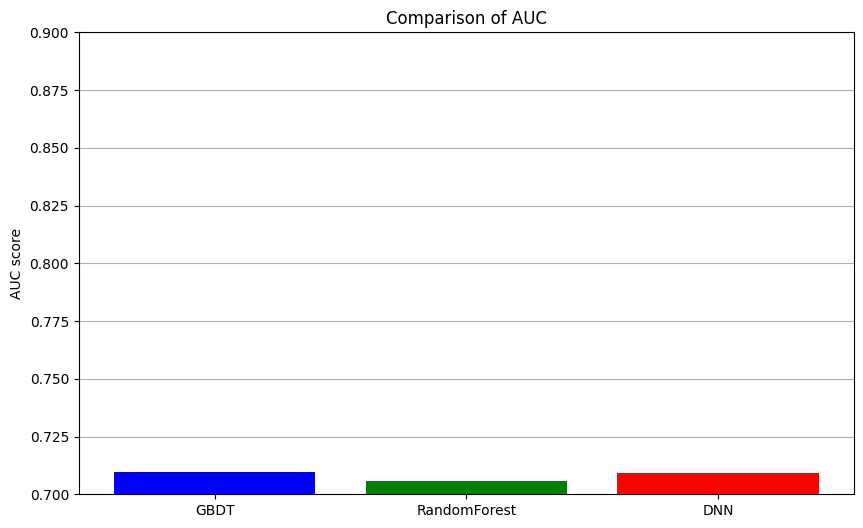

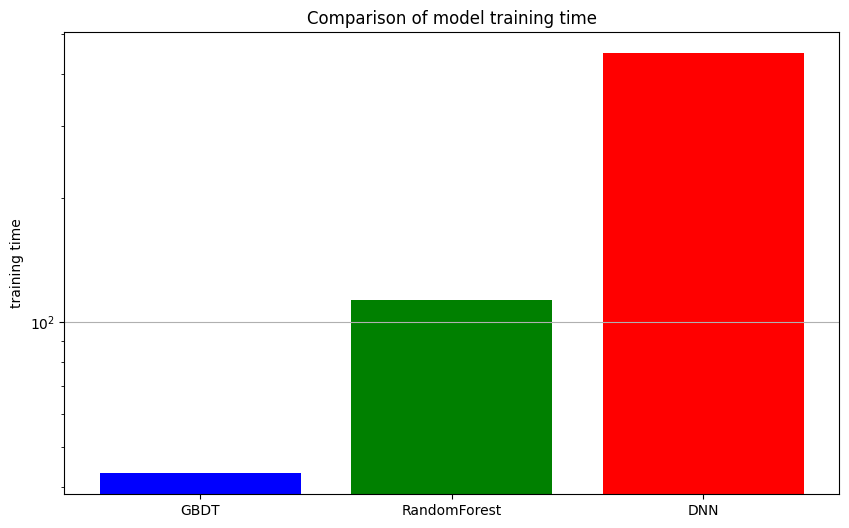

In [348]:
#模型比较
print("\n" + "="*50)
print("模型性能比较")
print("="*50)

# 收集所有结果
results_df = pd.DataFrame({
    'GBDT': gbm_results,
    'RandomForest': rf_results,
    'DNN': dnn_results
}).T

print("模型性能总结:")
print(results_df)

# 绘制AUC比较（如果可用）
if 'auc' in gbm_results:
    plt.figure(figsize=(10, 6))
    models = results_df.index
    auc_scores = results_df['auc'].values
    
    plt.bar(models, auc_scores, color=['blue', 'green', 'red'])
    plt.title('Comparison of AUC')
    plt.ylabel('AUC score')
    plt.ylim(0.7, 0.9)
    plt.grid(True, axis='y')
    plt.show()

# 绘制训练时间比较
plt.figure(figsize=(10, 6))
plt.bar(models, results_df['train_time'], color=['blue', 'green', 'red'])
plt.title('Comparison of model training time')
plt.ylabel('training time')
plt.yscale('log')  # 对数刻度显示时间差异
plt.grid(True, axis='y')
plt.show()